# News API Data Cleaning

In [3]:
#Importing required Libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
import string
import contractions
import unicodedata
import re

In [4]:
# Load DataFrame
df = pd.read_csv("News_API_Data_raw.csv")

In [5]:
#Lets look at the dataset
df

,Title,Description,Source,Published At
0,Paris votes to crack down on SUVs,Parisians have voted to increase parking charg...,The Verge,2024-02-05T12:24:14Z
1,NASA’s new mission will study microscopic plan...,A new NASA mission will study microscopic plan...,The Verge,2024-02-08T19:12:39Z
2,Inside the Beef Industry’s Campaign to Influen...,Big Beef is wooing science teachers with webin...,Wired,2024-02-01T12:00:00Z
3,Why a Supreme Court decision on fishing boats ...,The Supreme Court is poised to gut a key legal...,The Verge,2024-01-20T13:00:00Z
4,The Fossil Fuel Industry Knew About Climate Ch...,The Guardian reports:\n\nThe fossil fuel indus...,Slashdot.org,2024-02-04T12:34:00Z
...,...,...,...,...
95,Climate activist Greta Thunberg on trial in Lo...,Climate activist Greta Thunberg is on trial fo...,ABC News,2024-02-01T13:42:38Z
96,California’s Climate Has Come Unmoored,The weather of catastrophe is here.,The Atlantic,2024-02-07T17:29:10Z
97,Climate change is making it harder for trees t...,A new study highlights just how much climate c...,BGR,2024-02-03T15:33:00Z
98,Living Through the End of California,"In a new book, Manjula Martin faces up to the ...",The Atlantic,2024-02-02T14:12:27Z


In [6]:
#Making a Copy of the dataset
df_1=df

In [7]:
#COnverting columns to proper data types
df_1['Title'] = df_1['Title'].astype(str)
df_1['Description'] = df_1['Description'].astype(str)

In [8]:
#Removing NAN
df_1 = df_1[df_1['Description'] != 'nan']
df_1 = df_1[df_1['Title'] != 'nan']

In [9]:
# Cleaning Data - Fixing Contractions
df_1['Title'] = df['Title'].apply(lambda x: contractions.fix(x))
df_1['Description'] = df['Description'].apply(lambda x: contractions.fix(x))
df_1.head()

,Title,Description,Source,Published At
0,Paris votes to crack down on SUVs,Parisians have voted to increase parking charg...,The Verge,2024-02-05T12:24:14Z
1,NASA’s new mission will study microscopic plan...,A new NASA mission will study microscopic plan...,The Verge,2024-02-08T19:12:39Z
2,Inside the Beef Industry’s Campaign to Influen...,Big Beef is wooing science teachers with webin...,Wired,2024-02-01T12:00:00Z
3,Why a Supreme Court decision on fishing boats ...,The Supreme Court is poised to gut a key legal...,The Verge,2024-01-20T13:00:00Z
4,The Fossil Fuel Industry Knew About Climate Ch...,The Guardian reports:\n\nThe fossil fuel indus...,Slashdot.org,2024-02-04T12:34:00Z


In [10]:
#Normalizing
df_1['Title'] = df_1['Title'].apply(lambda x: unicodedata.normalize('NFKD', x).encode('ASCII', 'ignore').decode('utf-8'))
df_1['Description'] = df_1['Description'].apply(lambda x: unicodedata.normalize('NFKD', x).encode('ASCII', 'ignore').decode('utf-8'))
df_1.head()

,Title,Description,Source,Published At
0,Paris votes to crack down on SUVs,Parisians have voted to increase parking charg...,The Verge,2024-02-05T12:24:14Z
1,NASAs new mission will study microscopic plank...,A new NASA mission will study microscopic plan...,The Verge,2024-02-08T19:12:39Z
2,Inside the Beef Industrys Campaign to Influenc...,Big Beef is wooing science teachers with webin...,Wired,2024-02-01T12:00:00Z
3,Why a Supreme Court decision on fishing boats ...,The Supreme Court is poised to gut a key legal...,The Verge,2024-01-20T13:00:00Z
4,The Fossil Fuel Industry Knew About Climate Ch...,The Guardian reports:\n\nThe fossil fuel indus...,Slashdot.org,2024-02-04T12:34:00Z


In [11]:
# Cleaning Data - Removing whitespaces
df_1['Title'] = df_1['Title'].apply(lambda x: ' '.join(x.split()))
df_1['Description'] = df_1['Description'].apply(lambda x: ' '.join(x.split()))
df_1.head()

,Title,Description,Source,Published At
0,Paris votes to crack down on SUVs,Parisians have voted to increase parking charg...,The Verge,2024-02-05T12:24:14Z
1,NASAs new mission will study microscopic plank...,A new NASA mission will study microscopic plan...,The Verge,2024-02-08T19:12:39Z
2,Inside the Beef Industrys Campaign to Influenc...,Big Beef is wooing science teachers with webin...,Wired,2024-02-01T12:00:00Z
3,Why a Supreme Court decision on fishing boats ...,The Supreme Court is poised to gut a key legal...,The Verge,2024-01-20T13:00:00Z
4,The Fossil Fuel Industry Knew About Climate Ch...,The Guardian reports: The fossil fuel industry...,Slashdot.org,2024-02-04T12:34:00Z


In [12]:
#Removing punctuations
df_1['Title'] = df_1['Title'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
df_1['Description'] = df_1['Description'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
df_1.head()

,Title,Description,Source,Published At
0,Paris votes to crack down on SUVs,Parisians have voted to increase parking charg...,The Verge,2024-02-05T12:24:14Z
1,NASAs new mission will study microscopic plank...,A new NASA mission will study microscopic plan...,The Verge,2024-02-08T19:12:39Z
2,Inside the Beef Industrys Campaign to Influenc...,Big Beef is wooing science teachers with webin...,Wired,2024-02-01T12:00:00Z
3,Why a Supreme Court decision on fishing boats ...,The Supreme Court is poised to gut a key legal...,The Verge,2024-01-20T13:00:00Z
4,The Fossil Fuel Industry Knew About Climate Ch...,The Guardian reports The fossil fuel industry ...,Slashdot.org,2024-02-04T12:34:00Z


In [13]:
# Initialize the Snowball Stemmer for English
stemmer = SnowballStemmer('english')

df_1['Description'] = df_1['Description'].apply(lambda x: ' '.join([stemmer.stem(word) for word in word_tokenize(x)]))
df_1['Title'] = df_1['Title'].apply(lambda x: ' '.join([stemmer.stem(word) for word in word_tokenize(x)]))
df_1.head()

,Title,Description,Source,Published At
0,pari vote to crack down on suv,parisian have vote to increas park charg for o...,The Verge,2024-02-05T12:24:14Z
1,nasa new mission will studi microscop plankton...,a new nasa mission will studi microscop plant ...,The Verge,2024-02-08T19:12:39Z
2,insid the beef industri campaign to influenc s...,big beef is woo scienc teacher with webinar an...,Wired,2024-02-01T12:00:00Z
3,whi a suprem court decis on fish boat could ch...,the suprem court is pois to gut a key legal do...,The Verge,2024-01-20T13:00:00Z
4,the fossil fuel industri knew about climat cha...,the guardian report the fossil fuel industri f...,Slashdot.org,2024-02-04T12:34:00Z


In [14]:
#df_1.to_csv("News_API_Data_After_Stemming.csv")

In [15]:
# Task 2: Lemmatization
lemmatizer = WordNetLemmatizer()

df_1['Description'] = df_1['Description'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(x)]))
df_1['Title'] = df_1['Title'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(x)]))
df_1

,Title,Description,Source,Published At
0,pari vote to crack down on suv,parisian have vote to increas park charg for o...,The Verge,2024-02-05T12:24:14Z
1,nasa new mission will studi microscop plankton...,a new nasa mission will studi microscop plant ...,The Verge,2024-02-08T19:12:39Z
2,insid the beef industri campaign to influenc s...,big beef is woo scienc teacher with webinar an...,Wired,2024-02-01T12:00:00Z
3,whi a suprem court decis on fish boat could ch...,the suprem court is poi to gut a key legal doc...,The Verge,2024-01-20T13:00:00Z
4,the fossil fuel industri knew about climat cha...,the guardian report the fossil fuel industri f...,Slashdot.org,2024-02-04T12:34:00Z
...,...,...,...,...
95,climat activist greta thunberg on trial in lon...,climat activist greta thunberg is on trial for...,ABC News,2024-02-01T13:42:38Z
96,california climat ha come unmoor,the weather of catastroph is here,The Atlantic,2024-02-07T17:29:10Z
97,climat chang is make it harder for tree to breath,a new studi highlight just how much climat cha...,BGR,2024-02-03T15:33:00Z
98,live through the end of california,in a new book manjula martin face up to the wa...,The Atlantic,2024-02-02T14:12:27Z


In [16]:
#df_1.to_csv("News_API_Data_After_Lemmatization.csv")

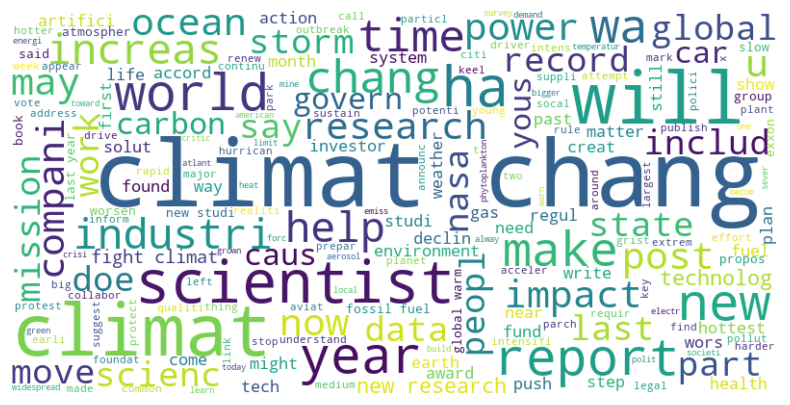

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate 'Title' and 'Description' columns
text = ' '.join(df_1['Description']) + ' ' + ' '.join(df_1['Description'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [18]:
# Task 3: CountVectorizer
count_vectorizer = CountVectorizer(max_df=0.8, min_df=2, max_features=1000)
count_matrix = count_vectorizer.fit_transform(df_1['Description'])
count_df_1 = pd.DataFrame(count_matrix.toarray(), columns=count_vectorizer.get_feature_names_out())
count_df_1.head()

,12,15,2023,2024,about,acceler,access,accord,action,activist,...,wors,worsen,would,write,year,you,young,your,yous,zoe
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
count_matrix = count_vectorizer.fit_transform(df_1['Title'])
count_df_2 = pd.DataFrame(count_matrix.toarray(), columns=count_vectorizer.get_feature_names_out())
count_df_2.head()

,15c,2023,2024,about,action,activist,add,administr,ai,and,...,whi,who,wildfir,will,world,worri,year,yearlong,your,yous
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
#df_1.to_csv("News_API_Data_CountVectorizer.csv")

In [21]:
# Task 4: TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, min_df=2, max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df_1['Description'])
tfidf_df_1 = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf_df_1.head()

,12,15,2023,2024,about,acceler,access,accord,action,activist,...,wors,worsen,would,write,year,you,young,your,yous,zoe
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
tfidf_matrix = tfidf_vectorizer.fit_transform(df_1['Title'])
tfidf_df_2 = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf_df_2.head()

,15c,2023,2024,about,action,activist,add,administr,ai,and,...,whi,who,wildfir,will,world,worri,year,yearlong,your,yous
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.292155,...,0.000000,0.0,0.0,0.415137,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.433785,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.435081,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
#df_1.to_csv("News_API_Data_tfidfVectorizer.csv")